<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/hooks_cnn_res_dens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "torch==1.4" "torchvision==0.5.0" #use the old version

     |████████████████████████████████| 753.4MB 20kB/s 
     |████████████████████████████████| 4.0MB 49.9MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [2]:
!pip install ipdb
from ipdb import set_trace as st

  Created wheel for ipdb: filename=ipdb-0.13.4-cp36-none-any.whl size=10973 sha256=007223e0b7bf0676bd8c8d090fe4790e2616e564ca787e469119a647f063ba6e
  Stored in directory: /root/.cache/pip/wheels/56/51/e4/c91c61e3481a1a967beb18c4ea7a2b138a63cce94170b2e206
Successfully built ipdb


In [3]:
from fastai import *
from fastai.vision import *

In [4]:
path = untar_data(URLs.MNIST)
path.ls()

[PosixPath('/root/.fastai/data/mnist_png/training'),
 PosixPath('/root/.fastai/data/mnist_png/testing')]

In [5]:
(path/'..').ls()

[PosixPath('/root/.fastai/data/mnist_png/../mnist_png.tgz'),
 PosixPath('/root/.fastai/data/mnist_png/../mnist_png')]

In [6]:
get_label = lambda x: x.stem
tfms = [[rand_pad(1, size = 1, mode = 'zeros')], []]

In [7]:
src = ImageList.from_folder(path).split_by_folder(train = 'training', valid = 'testing').label_from_folder()

In [8]:
il = ImageList.from_folder(path)
il.items

array([PosixPath('/root/.fastai/data/mnist_png/training/9/49591.png'),
       PosixPath('/root/.fastai/data/mnist_png/training/9/7335.png'),
       PosixPath('/root/.fastai/data/mnist_png/training/9/52203.png'),
       PosixPath('/root/.fastai/data/mnist_png/training/9/46148.png'), ...,
       PosixPath('/root/.fastai/data/mnist_png/testing/1/4178.png'),
       PosixPath('/root/.fastai/data/mnist_png/testing/1/7811.png'),
       PosixPath('/root/.fastai/data/mnist_png/testing/1/5.png'),
       PosixPath('/root/.fastai/data/mnist_png/testing/1/6044.png')], dtype=object)

In [9]:
split = il.split_by_folder(train = 'training', valid = 'testing')
split

ItemLists;

Train: ImageList (60000 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: /root/.fastai/data/mnist_png;

Valid: ImageList (10000 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: /root/.fastai/data/mnist_png;

Test: None

In [10]:
labeled = split.label_from_folder()
labeled

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
9,9,9,9,9
Path: /root/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
9,9,9,9,9
Path: /root/.fastai/data/mnist_png;

Test: None

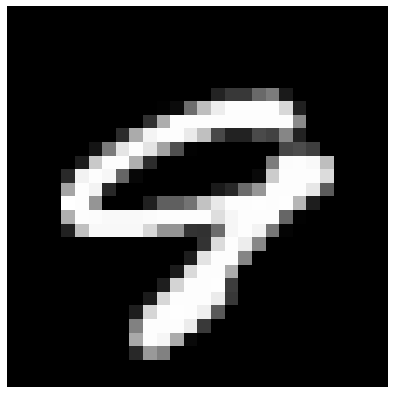

In [11]:
#test
x = rand_pad(1, 1, 'zeros')
img = labeled.train.x[0]
img.show(figsize = (7, 7))

In [12]:
doc(rand_pad)

In [11]:
tfms = [rand_pad(1, 28, 'zeros'), []]
tfms

[[RandTransform(tfm=TfmPixel (pad), kwargs={'padding': 1, 'mode': 'zeros'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (crop), kwargs={'size': 28, 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True)],
 []]

In [12]:
transformed = labeled.transform(tfms)
transformed

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
9,9,9,9,9
Path: /root/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
9,9,9,9,9
Path: /root/.fastai/data/mnist_png;

Test: None

In [13]:
data = transformed.databunch(bs = 64).normalize()

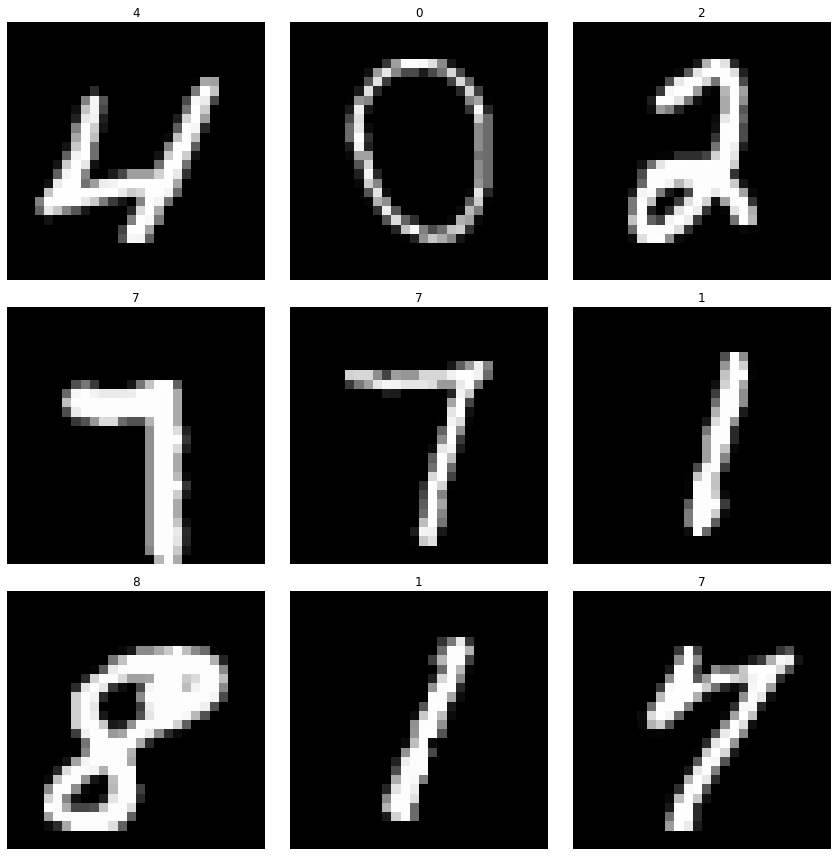

In [14]:
data.show_batch(rows = 3)

In [15]:
#test
img = data.train_ds.x[0]
img.data, img.data.shape

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]), torch.Size([3, 28, 28]))

In [46]:
#convolutional Part.... Excited again!!

In [16]:
#test
c = nn.Conv2d(3, 10, (3, 3))
op = c(img.data[None])
op.shape

torch.Size([1, 10, 26, 26])

In [17]:
def get_conv(ni, nf):
  return nn.Conv2d(ni, nf, kernel_size=(3, 3), stride = 2, padding = 1)

In [18]:
#test
c = get_conv(3, 10)
op = c(img.data[None])
op.shape


torch.Size([1, 10, 14, 14])

In [19]:
#test
c1 = get_conv(10, 20)
op1 = c1(op)
op1.shape

torch.Size([1, 20, 7, 7])

In [20]:
def get_model():
  model = nn.Sequential(
    get_conv(3, 10),  #14
    nn.BatchNorm2d(10),
    nn.ReLU(),
    get_conv(10, 24), #7
    nn.BatchNorm2d(24),
    nn.ReLU(),
    get_conv(24, 32), #4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    get_conv(32, 16), #2 - 16*2*2,
    nn.BatchNorm2d(16),
    nn.ReLU(),
    get_conv(16, 10), #10*1*1,
    nn.BatchNorm2d(10),
    nn.ReLU(), #10*1*1
    Flatten()
  )
  return model

In [26]:
#test
img.data[None].shape

torch.Size([1, 3, 28, 28])

In [27]:
#test
y = get_conv(3, 10)(img.data[None])
y = nn.BatchNorm2d(10)(y)
y = nn.ReLU()(y)
y.shape

torch.Size([1, 10, 14, 14])

In [95]:
#test
y = get_conv(10, 24)(y) #7
y = nn.BatchNorm2d(24)(y)
y = nn.ReLU()(y)
y.shape

torch.Size([1, 24, 7, 7])

In [96]:
#test
y = get_conv(24, 32)(y) #4
y = nn.BatchNorm2d(32)(y)
y = nn.ReLU()(y)
y.shape

torch.Size([1, 32, 4, 4])

In [97]:
#test
y = get_conv(32, 16)(y) #2
y = nn.BatchNorm2d(16)(y)
y = nn.ReLU()(y)
y.shape

torch.Size([1, 16, 2, 2])

In [98]:
#test
y = get_conv(16, 10)(y) #2
y = nn.BatchNorm2d(10)(y) #- use model.eval() -- gives error if the batch size is only one vector
y = nn.ReLU()(y)
y.shape

In [111]:
#test
res = model.eval()(img.data[None])
res.shape

torch.Size([1, 10])

(tensor([[0.0316, 0.0819, 0.0000, 0.0000, 0.0000, 0.0110, 0.0156, 0.0301, 0.0094,
          0.0000]], grad_fn=<ViewBackward>), None)

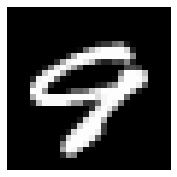

In [114]:
#test
res, img.show()

In [21]:
loss_func = nn.CrossEntropyLoss()

In [22]:
def update(x, y, lr):

  res = model(x)
  loss = loss_func(res, y)
  loss.backward()
  with torch.no_grad():

    for param in model.parameters():
      param.sub_(lr*param.grad)
      param.grad.zero_()
  return loss.item()

In [23]:
model = get_model().cuda()

In [24]:
losses = []
wlosses = []
lr = 1e-01
prev_loss = 0
model = get_model().cuda()
for x, y in data.train_dl:
  cl = update(x, y, lr)
  if prev_loss == 0:
    wloss = cl
  else:
    wloss = 0.1*cl + 0.9*prev_loss
  prev_loss = wloss
  wlosses.append(wloss)
  losses.append(cl)

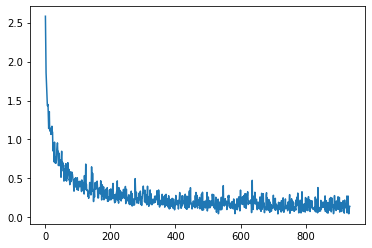

In [25]:
plt.plot(losses)

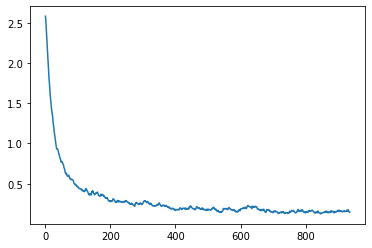

In [26]:
plt.plot(wlosses)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


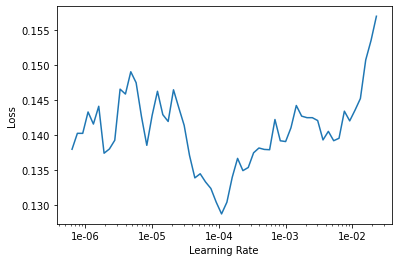

In [27]:
learn = Learner(data, model, metrics=accuracy)
learn.lr_find()
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(3, max_lr = 1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,0.188877,0.165986,0.943900,00:17
1,0.106505,0.056129,0.983900,00:16
2,0.052561,0.030796,0.990500,00:16


In [29]:
def get_model():
  model = nn.Sequential(
    get_conv_layer(3, 10),  #14
    get_conv_layer(10, 24), #7
    get_conv_layer(24, 32), #4
    get_conv_layer(32, 16), #2 - 16*2*2,
    get_conv_layer(16, 10), #10*1*1, #10*1*1
    Flatten()
  )
  return model

def get_conv_layer(ni, nf, stride = 2):
  return nn.Sequential(nn.Conv2d(ni, nf, kernel_size=(3, 3), stride = stride, padding = 1), nn.BatchNorm2d(nf), nn.ReLU())


In [30]:
losses = []
wlosses = []
lr = 1e-01
prev_loss = 0 
model = get_model().cuda()
for x, y in data.train_dl:
  cl = update(x, y, lr)
  if prev_loss == 0:
    wloss = cl
  else:
    wloss = 0.1*cl + 0.9*prev_loss
  prev_loss = wloss
  wlosses.append(wloss)
  losses.append(cl)

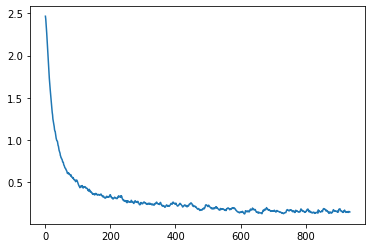

In [31]:
plt.plot(wlosses)

In [32]:
model = get_model().cuda()
learn = Learner(data, model, metrics = accuracy)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


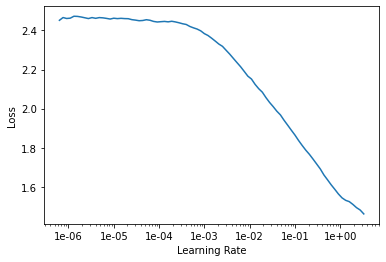

In [33]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(3, max_lr = slice(1e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.164119,0.094643,0.973700,00:16
1,0.076349,0.038733,0.988700,00:16
2,0.052710,0.026547,0.992000,00:16


In [35]:
class ResBlock(nn.Module):
  def __init__(self, nf):
    super().__init__()
    self.layer = get_conv_layer(nf, nf, stride = 1)
  
  def forward(self, x):
    op = self.layer(x)
    return op + x


In [36]:
def get_res_layer(ni, nf):
  return nn.Sequential(get_conv_layer(ni, nf), ResBlock(nf))

In [37]:

model = nn.Sequential(
    get_res_layer(3, 10),  #14
    get_res_layer(10, 24), #7
    get_res_layer(24, 32), #4
    get_res_layer(32, 16), #2 - 16*2*2,
    get_res_layer(16, 10), #10*1*1, #10*1*1
    Flatten()
)

In [38]:
learn = Learner(data, model, metrics = accuracy)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


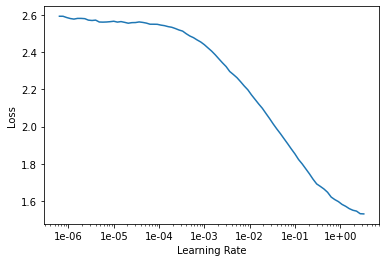

In [39]:
learn.recorder.plot()

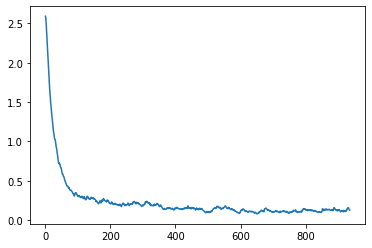

In [40]:
losses = []
wlosses = []
lr = 1e-01
prev_loss = 0 
model = model.cuda()

for x, y in data.train_dl:
  cl = update(x, y, lr)
  if prev_loss == 0:
    wloss = cl
  else:
    wloss = 0.1*cl + 0.9*prev_loss
  prev_loss = wloss
  wlosses.append(wloss)
  losses.append(cl)

plt.plot(wlosses)

In [41]:
learn.fit_one_cycle(3, max_lr = slice(5e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.140963,0.143952,0.954800,00:20
1,0.078019,0.059070,0.982200,00:20
2,0.043930,0.019596,0.994100,00:20


In [44]:
#test
x = torch.randn((1, 4, 4, 4))
y = torch.randn((1, 4, 4, 4))
x.shape, y.shape
torch.cat([x, y], 1).shape

torch.Size([1, 8, 4, 4])

In [42]:
class DensBlock(nn.Module):
  def __init__(self, nf):
    super().__init__()
    self.layer = get_conv_layer(nf, nf, stride = 1)
  
  def forward(self, x):
    result = self.layer(x)
    return torch.cat((result, x), dim = 1)

In [43]:
def get_dens_layer(ni, nf):
  return nn.Sequential(get_conv_layer(ni, nf), DensBlock(nf))

In [44]:
model = nn.Sequential(
    get_dens_layer(3, 10), #14 * 20
    get_dens_layer(20, 30), #7 * 60
    get_dens_layer(60, 20), #4 *40
    get_dens_layer(40, 10), #2 * 20
    get_res_layer(20, 10), #1 * 10
    Flatten()
)

In [ ]:
model.__dict__

In [45]:
#test
model = model.cuda()
for i in data.train_dl:
  x, y = i
res = model(x)
res.shape

torch.Size([64, 10])

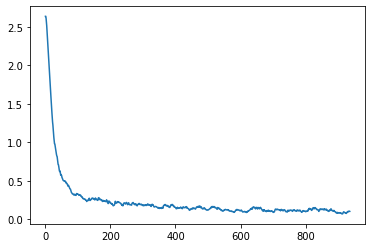

In [46]:
losses = []
wlosses = []
lr = 1e-01
prev_loss = 0 
model = model.cuda()

for x, y in data.train_dl:
  cl = update(x, y, lr)
  if prev_loss == 0:
    wloss = cl
  else:
    wloss = 0.1*cl + 0.9*prev_loss
  prev_loss = wloss
  wlosses.append(wloss)
  losses.append(cl)

plt.plot(wlosses)

In [47]:
learn = Learner(data, model, metrics = accuracy)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [48]:
losses[-1]

0.0760524719953537

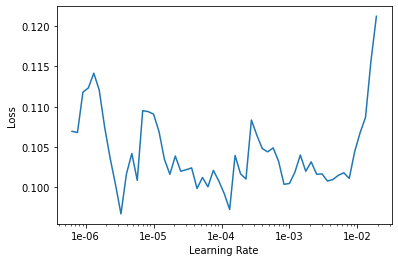

In [49]:
learn.recorder.plot()

In [50]:
learn.fit_one_cycle(3, max_lr = 6e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.132215,0.092594,0.972300,00:21
1,0.061268,0.030127,0.990900,00:21
2,0.046731,0.021091,0.993100,00:20


In [ ]:
PixelShuffle_ICNR()

In [76]:
def visualize_hook(self, *args):
  print("visualizing hooks")
  st()

In [51]:
def get_dens():
  model = nn.Sequential(
    get_dens_layer(3, 10), #14 * 20
    get_dens_layer(20, 30), #7 * 60
    get_dens_layer(60, 20), #4 *40
    get_dens_layer(40, 10), #2 * 20
    get_res_layer(20, 10), #1 * 10
    Flatten()
  )
  return model.cuda()

In [57]:
model = get_dens()
# model.register_forward_hook(visualize_hook)

In [ ]:
#test
for i in model:
  print(i)
  print('\n\n')

In [63]:
#test
item = data.train_ds.x[0]
item.shape, item.data
xb = data.one_batch()[0].cuda()
xb.shape, xb.device

(torch.Size([64, 3, 28, 28]), device(type='cuda', index=0))

In [58]:
class Hook():
  def __init__(self, module):
    self.module = module
    self.stored = None
    self.module.register_forward_hook(self.hook_function)

  def hook_function(self, module, input, output):
    self.stored = output

In [65]:
#test
hooks = [Hook(i) for i in model]
hooks[0].stored
res = model(xb)
res.shape
hooks[0].stored.shape

In [69]:
#test
for i in hooks:
  print(i.stored.shape)

torch.Size([64, 20, 14, 14])
torch.Size([64, 60, 7, 7])
torch.Size([64, 40, 4, 4])
torch.Size([64, 20, 2, 2])
torch.Size([64, 10, 1, 1])
torch.Size([64, 10])


In [ ]:
#unet

#1. down sampling
#2. increasing channels -- keeping the shape intact... stride 1 conv
#3. up sampling part

#1 . Down sampling:

#     calculating the values and reducing sizes
#     storing activations of each dens or res block in hooks

#3.  Up Sampling:

#     increase the shape of it to double and reduce the channels to half
#     get the hooked activations from downsampling path and concatinate to the updated input
#     forward the output

In [71]:
#test
a = torch.ones((2, 2))
b = torch.ones((4, 4))
print(a)
print(b)

tensor([[1., 1.],
        [1., 1.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [72]:
#test
doc(PixelShuffle_ICNR)

In [78]:
#test
a = torch.randn((2, 2))
b = torch.randn((2, 2))
print(a, b)
# print(a*b)
torch.cat((a, b), dim = 1)
torch.cat((a, b), dim =1) 

tensor([[1.2984, 0.7472],
        [1.7210, 0.6032]]) tensor([[-0.5044,  0.3786],
        [-0.1616, -0.3240]])


tensor([[ 1.2984,  0.7472, -0.5044,  0.3786],
        [ 1.7210,  0.6032, -0.1616, -0.3240]])

In [76]:
#test
inp = torch.randn((2, 2))
ws = [torch.randn(2, 2) for i in range(0, 4)]
ops = [inp*i for i in ws]
ops
len(ops[0])

In [96]:
#test
res = torch.Tensor()
sample = ops[0]
for i in range(len(sample)):
  row_tens =torch.Tensor()
  for j in range(len(sample[i])):
    l1 = ops[0][i][j], ops[1][i][j]
    l2 = ops[2][i][j], ops[3][i][j]
    row_tens = torch.cat((row_tens, torch.Tensor([l1, l2])), 1)
  res = torch.cat((res, row_tens), 0)
res.shape

torch.Size([4, 4])

In [102]:
#test
a, b = torch.randn((4, 2, 2)), torch.randn((4, 2, 2))
a.shape, b.shape

(torch.Size([4, 2, 2]), torch.Size([4, 2, 2]))